In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

sc = StandardScaler()
warnings.filterwarnings('ignore')
%matplotlib inline

In [12]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd8327db190>,
      dtype=object)

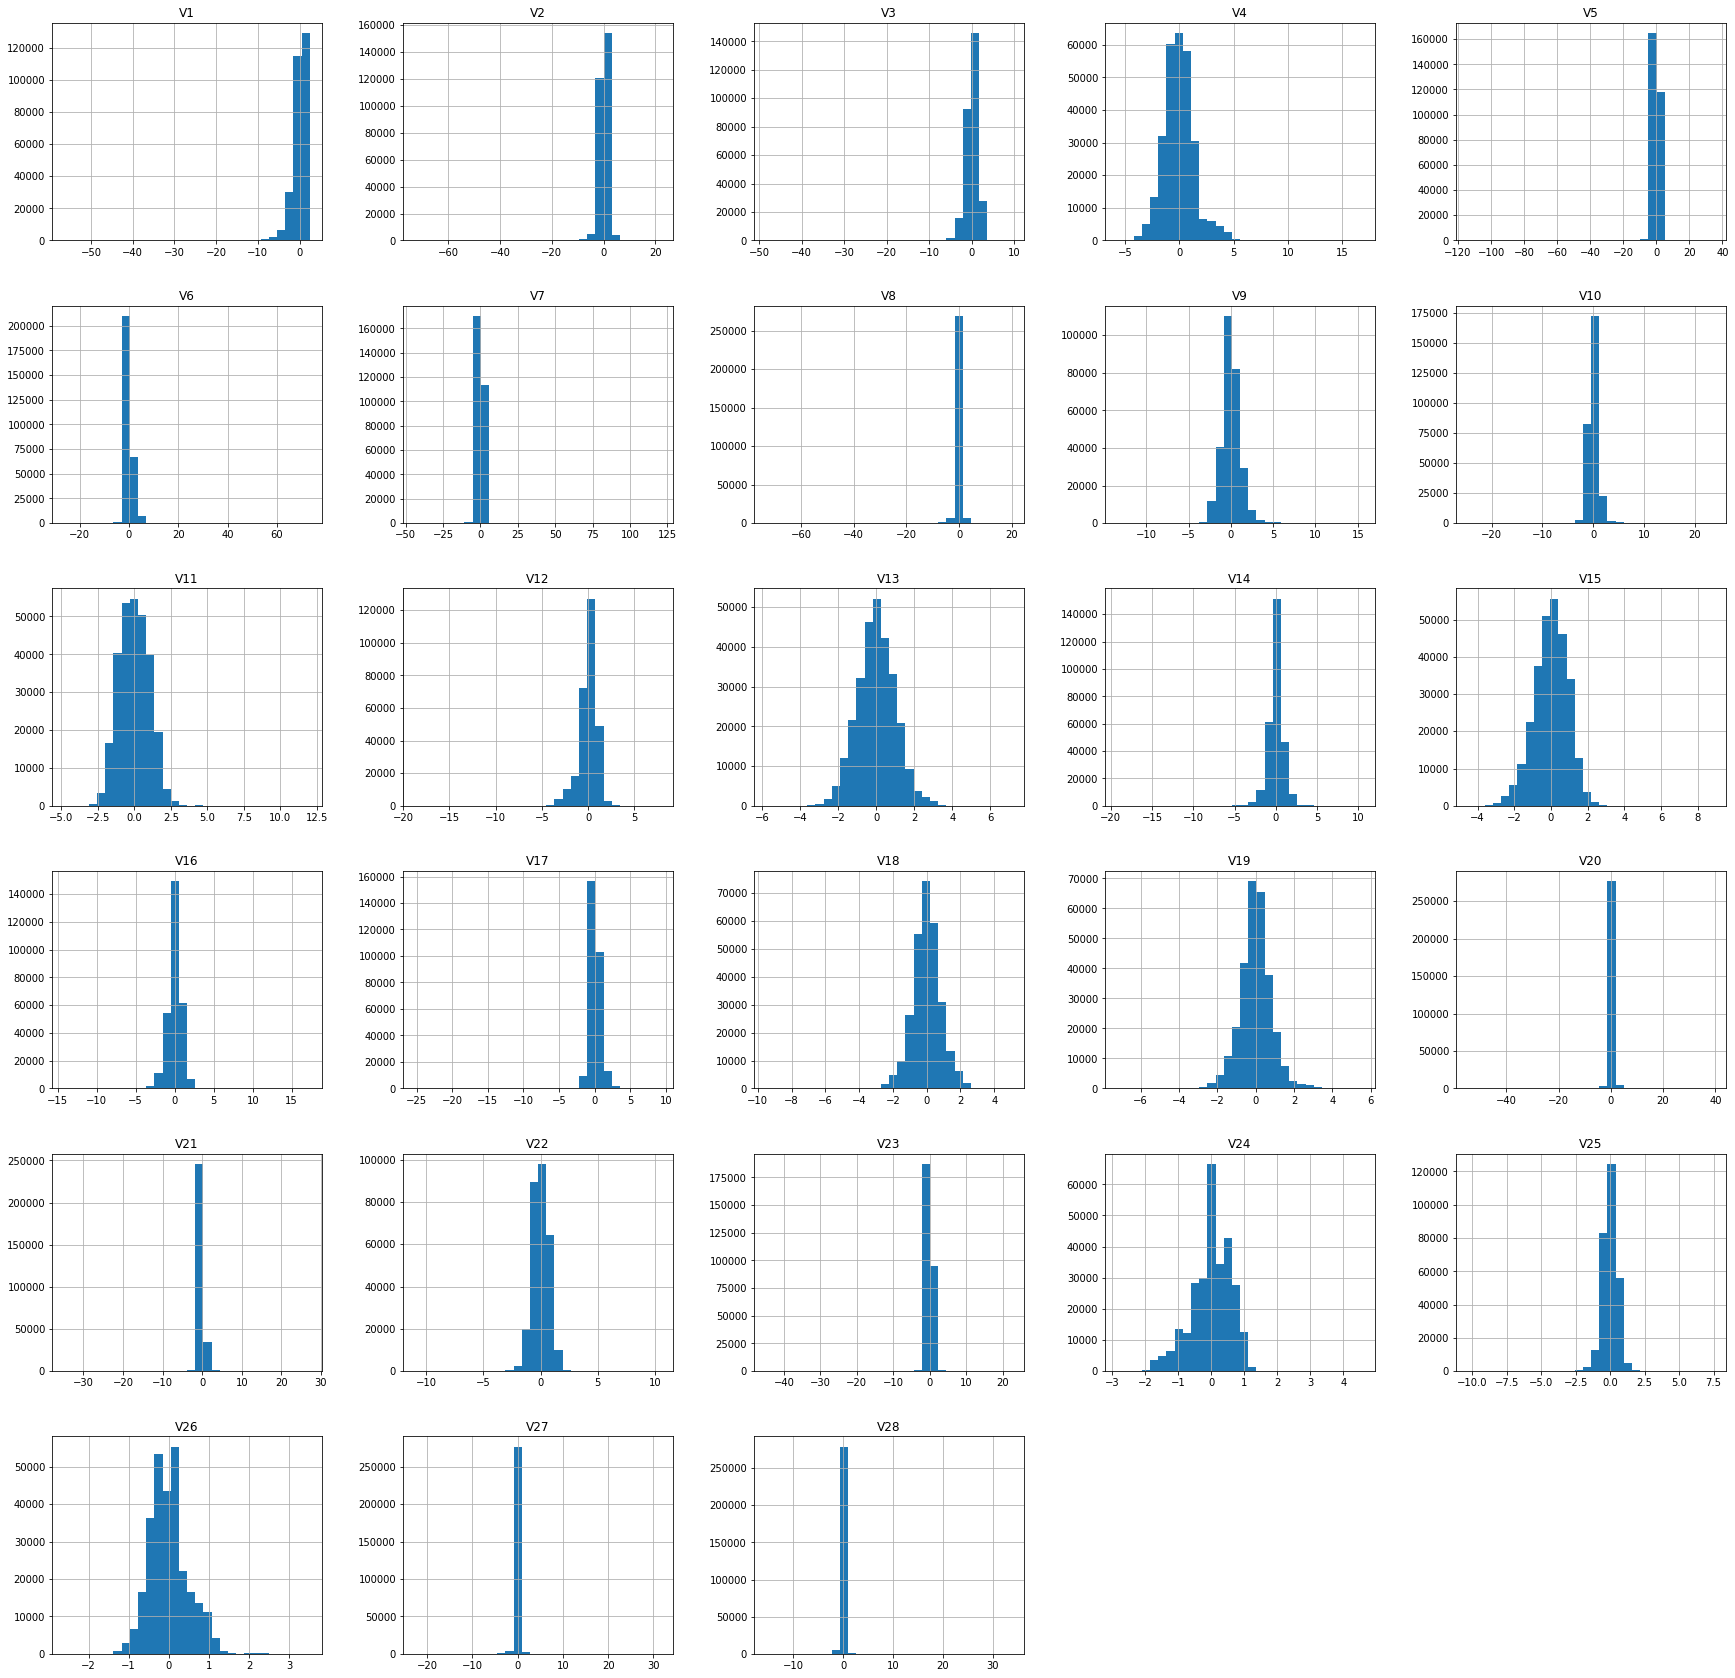

In [14]:
df_temp = df.drop(columns=['Time', 'Amount','Class'], axis=1)
df_temp.hist(bins=30, figsize=(30,30))

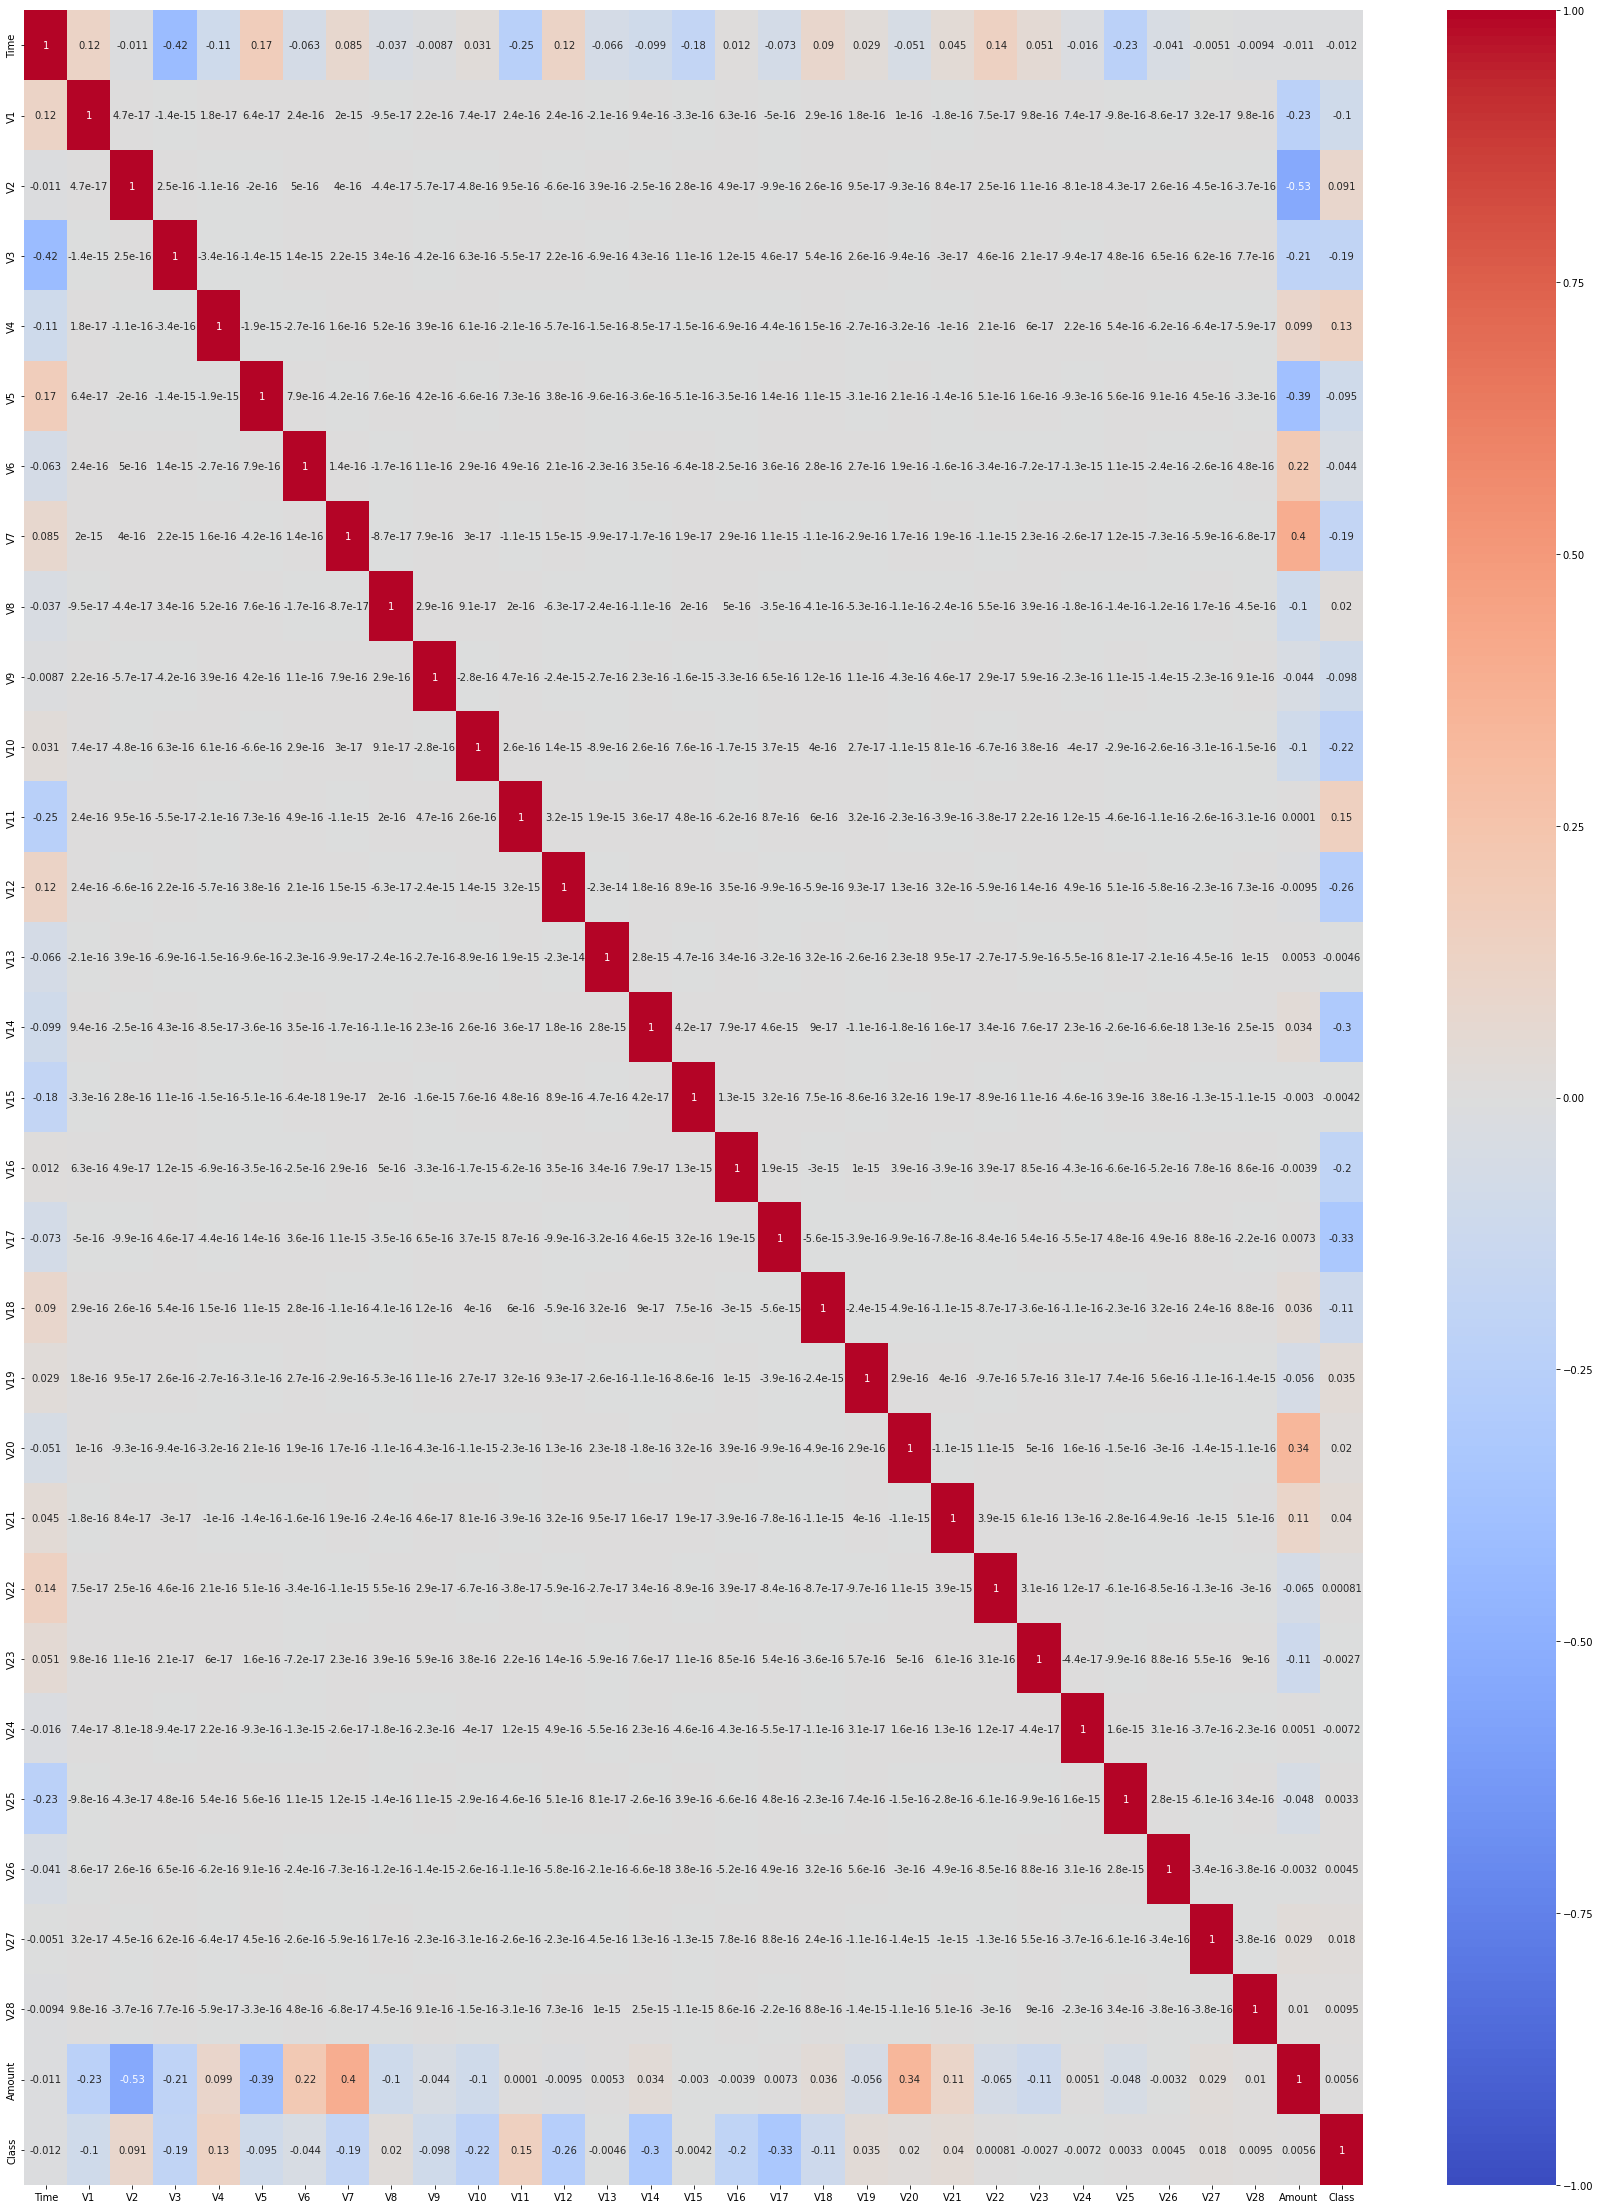

In [15]:
plt.figure(figsize=(30,40))
sns.heatmap(df.corr(), vmin=-1., vmax=1., annot=True, cmap='coolwarm')

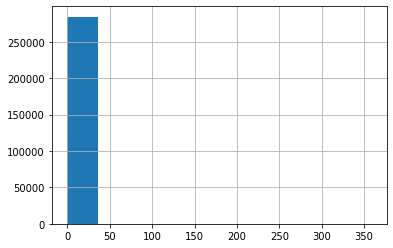

In [17]:
new_df = df.copy()
new_df['Amount'] = RobustScaler().fit_transform(new_df['Amount'].to_numpy().reshape(-1,1))
new_df['Amount'].hist()

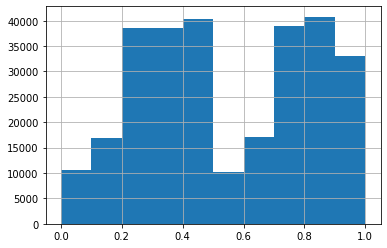

In [19]:
new_df['Time'] = ( new_df['Time'] - new_df['Time'].min() ) / ( new_df['Time'].max() - new_df['Time'].min() )
new_df['Time'].hist()

In [26]:
new_df = new_df.sample(frac= 1)

In [27]:
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33579,0.215832,1.056088,-0.189309,0.192567,1.313237,-0.031142,0.495486,-0.079214,0.112792,0.616254,...,-0.044215,-0.028639,-0.260849,-0.750787,0.737101,-0.196795,0.036381,0.022926,0.889820,0
61266,0.287861,1.121575,0.167514,0.529411,1.482242,-0.341588,-0.376595,0.074390,-0.027569,0.301972,...,-0.076621,-0.019221,-0.028553,0.402570,0.607802,-0.332767,0.036971,0.020523,-0.046671,0
121230,0.440524,0.981792,-1.151101,0.534658,-0.485555,-1.510814,-0.640341,-0.529051,-0.090872,-0.974510,...,-0.072582,-0.134294,-0.126938,0.590085,0.095115,1.082127,-0.079035,0.034420,2.269266,0
179769,0.718986,-0.196399,0.128235,0.446085,-1.689434,0.638818,-0.331633,1.115615,-0.357699,0.920142,...,0.247463,1.193550,-0.532325,-0.632028,0.296043,1.051967,-0.098649,-0.101298,0.321386,0
23672,0.190188,1.184491,0.268953,0.260943,1.142464,-0.295437,-0.952762,0.262438,-0.243415,-0.026831,...,0.046521,0.112671,-0.127524,0.395106,0.678202,-0.331556,0.008110,0.025828,0.189059,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5168,0.028456,0.945910,-0.832504,0.880598,-0.637727,-0.978465,0.507006,-0.970658,0.388224,3.095443,...,0.124262,0.623589,-0.123970,-0.336001,0.305006,-0.416397,0.060094,0.020075,0.973381,0
275850,0.965056,2.223978,-0.578064,-1.279806,-0.877490,-0.507757,-1.414539,-0.205135,-0.516659,-0.746568,...,0.450303,1.390817,-0.030041,0.146642,0.250225,0.061195,-0.029960,-0.062266,-0.097813,0
191460,0.748096,-0.191853,0.799235,-0.474313,-0.502249,1.089030,-0.840567,0.879030,-0.106871,0.063215,...,-0.340525,-0.808765,0.330683,0.490019,-0.391732,0.116823,0.121624,0.055208,-0.282401,0
96109,0.379717,-1.289461,1.473647,0.097777,0.796490,0.095694,-0.516830,0.028410,0.685627,-0.866565,...,0.157158,0.359196,-0.280533,-0.415886,-0.043976,-0.277322,0.104489,-0.002169,-0.040523,0


In [50]:
train, test, val = new_df[:220000], new_df[220000:252000], new_df[252000:] 
train['Class'].value_counts(), test['Class'].value_counts(), val['Class'].value_counts()

(0    219608
 1       392
 Name: Class, dtype: int64,
 0    31953
 1       47
 Name: Class, dtype: int64,
 0    32754
 1       53
 Name: Class, dtype: int64)

In [51]:
train_np, test_np, val_np = train.to_numpy(), test.to_numpy(), val.to_numpy()
train_np.shape, test_np.shape, val_np.shape

((220000, 31), (32000, 31), (32807, 31))

In [52]:
x_train, y_train = train_np[:, :-1], train_np[:, -1]
x_test, y_test = test_np[:, :-1], test_np[:, -1]
x_val, y_val = val_np[:, :-1], val_np[:, -1]
x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_val.shape, y_val.shape

((220000, 30), (220000,), (32000, 30), (32000,), (32807, 30), (32807,))

In [35]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
logistic_model.score(x_train, y_train)

0.999225

In [36]:
print(classification_report(y_val, logistic_model.predict(x_val)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     22766
         1.0       0.82      0.66      0.73        41

    accuracy                           1.00     22807
   macro avg       0.91      0.83      0.86     22807
weighted avg       1.00      1.00      1.00     22807

